In [41]:
import pandas as pd
url = "/Users/lucileyibingchen/Downloads/decision_tree_dataset.csv"
ori_data = pd.read_csv(url)
ori_data


,Company,Position,Education,Salary > 100k
0,Google,Sales Manager,Bachelor,No
1,Google,Sales Manager,Master,No
2,Google,Business Analyst,Bachelor,Yes
3,Google,Business Analyst,Master,Yes
4,Google,Software Engineer,Bachelor,No
5,Google,Software Engineer,Master,Yes
6,ABC Pharm,Sales Manager,Bachelor,No
7,ABC Pharm,Software Engineer,Bachelor,No
8,ABC Pharm,Business Analyst,Bachelor,Yes
9,ABC Pharm,Business Analyst,Master,Yes


In [49]:
# 数据预处理
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data = pd.DataFrame()
data['Company'] = label_encoder.fit_transform(ori_data['Company'])
data['Position'] = label_encoder.fit_transform(ori_data['Position'])
data['Education'] = label_encoder.fit_transform(ori_data['Education'])
data['Salary > 100k'] = label_encoder.fit_transform(ori_data['Salary > 100k'])
                                              
data

,Company,Position,Education,Salary > 100k
0,2,1,0,0
1,2,1,1,0
2,2,0,0,1
3,2,0,1,1
4,2,2,0,0
5,2,2,1,1
6,0,1,0,0
7,0,2,0,0
8,0,0,0,1
9,0,0,1,1


In [127]:
# seperate the x and y labels of dataset
features = ['Company','Position','Education']
target = label_encoder.classes_
X = data[features]
y = data['Salary > 100k']
X[:5]
# y[:5]

,Company,Position,Education
0,2,1,0
1,2,1,1
2,2,0,0
3,2,0,1
4,2,2,0


In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


# 切分train data 和 test data for both x and y
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 100)

In [159]:
# use the training dataset to train the model
clf_entropy = DecisionTreeClassifier(criterion = "entropy",max_depth=3, random_state = 100)


clf_entropy = clf_entropy.fit(X_train,y_train)
y_pred = clf_entropy.predict(X_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.6666666666666666

In [161]:
for rs in [1, 10, 42, 90, 100]:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=rs)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"random_state={rs}: Accuracy = {metrics.accuracy_score(y_test, y_pred)}")

random_state=1: Accuracy = 1.0
random_state=10: Accuracy = 1.0
random_state=42: Accuracy = 0.6666666666666666
random_state=90: Accuracy = 0.6666666666666666
random_state=100: Accuracy = 0.6666666666666666


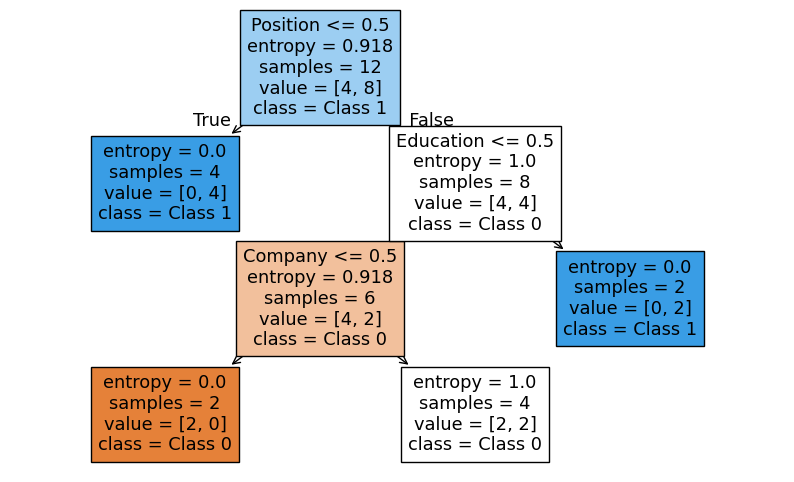

In [163]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(clf_entropy, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"])
plt.show()

In [165]:
#  if the split criterion is gini 
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, 
                                  max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)s
y_pred = clf_gini.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# entropy 关注数据的混乱程度，while gini关注dataset中不同类别样本的混合程度
# entropy 越大，数据越混乱，越难分类。
# entropy易于计算，容易converge，所以数据小的情况用entropy



Accuracy: 0.6666666666666666


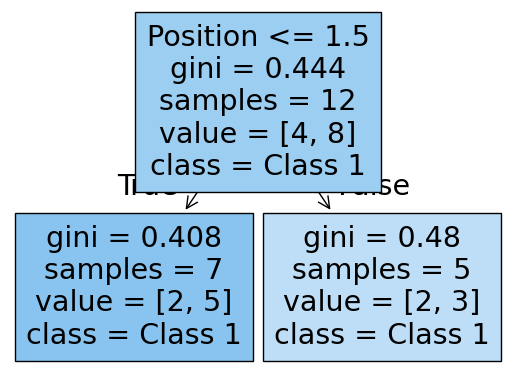

In [173]:
from sklearn import tree
import matplotlib

tree.plot_tree(clf_gini,filled = True, feature_names = features,class_names=["Class 0", "Class 1"])
plt.show()

In [179]:
from sklearn.tree import export_text

r_entropy = export_text(clf_entropy, feature_names=features) 
r_gini = export_text(clf_gini, feature_names=features)     

print(r_entropy)


|--- Position <= 0.50
|   |--- class: 1
|--- Position >  0.50
|   |--- Education <= 0.50
|   |   |--- Company <= 0.50
|   |   |   |--- class: 0
|   |   |--- Company >  0.50
|   |   |   |--- class: 0
|   |--- Education >  0.50
|   |   |--- class: 1
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.



In [181]:
print(r_gini)

|--- Position <= 1.50
|   |--- class: 1
|--- Position >  1.50
|   |--- class: 1

